In [114]:
!pip install plotly

In [115]:
!pip install dash pandas plotly

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import plotly.graph_objects as go

In [117]:
df=pd.read_csv('cardiac arrest dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [118]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [119]:
df['sex_label']=df['sex'].map({1:'Male',0:'Female'})

In [120]:
df['sex'].value_counts()

,count
sex,
1,713
0,312


In [121]:
fig=px.scatter(df,x='age',y='trestbps',title='Age vs Blood Pressure',hover_data=['sex'])
fig.update_traces(
    marker=dict(symbol='circle',size=16,color='Red',
                line=dict(width=2)))
fig.show()

In [122]:
fig=px.scatter(df,x='age',y='chol',title='Age vs Cholestrol')
fig.update_traces(
    marker=dict(symbol='circle',size=13,color='lightblue',
    line=dict(width=2,color='blue')
))
fig.show()

In [123]:
fig=px.scatter_3d(df,x='age',y='chol',z='trestbps',color='fbs',color_discrete_map={0:'red',1:'green'},
                  title="3D scatter plot : Age vs Cholestrol vs Blood Pressure",
                  labels={'age':'Age','chol':'Cholestrol','trestbps':'Blood Pressure'},
                  hover_data=['sex'])
fig.show()

In [124]:
print(df['fbs'].unique())


[0 1]


Filtering females

In [125]:
females=df[df['sex']==0]

In [126]:
females_high_col_sum=females[females['chol']>200].value_counts().sum()
females_high_col_sum

np.int64(267)

In [127]:
females_high_col=females[females['chol']>200]


In [128]:
fig=px.scatter(females_high_col,x='age',y='chol',color='target',title='Age vs cholestrol (Females)')
fig.update_traces(
    marker=dict(symbol='circle',size=13,color='pink',
              line=dict(width=2,color='purple')))
fig.show()

Filtering male Cholestrol

In [129]:
male=df[df['sex']==1]

In [130]:
male_high_col_sum=male[male['chol']>200].value_counts().sum()
male_high_col_sum

np.int64(586)

In [131]:
male_high_col=male[male['chol']>200]

In [132]:
fig=px.scatter(male_high_col,x='age',y='chol',title='Age vs Cholestol (Male)')
fig.update_traces(
    marker=dict(symbol='circle',size=13,color='blue',
                line=dict(width=2,color='light blue'))
)
fig.show()

In [133]:
fig = px.bar(df.groupby('sex')['chol'].mean().reset_index(),
             x='sex', y='chol', title='Avg Cholesterol by Gender')
fig.show()

Drill Down

In [134]:
app = dash.Dash(__name__)


fig1 = px.bar(df.groupby('sex')['thalach'].mean().reset_index(),
              x='sex', y='thalach', title='Max Heart rate by Gender')

app.layout = html.Div([
    dcc.Graph(id='main-plot', figure=fig1),
    dcc.Graph(id='detail-plot')
])

@app.callback(
    Output('detail-plot', 'figure'),
    Input('main-plot', 'clickData')
)
def update_detail_plot(clickData):
    if clickData is None:
        return px.scatter(title="Click a bar to drill down")

    selected_sex = int(clickData['points'][0]['x'])
    filtered_df = df[df['sex'] == selected_sex]

    fig = px.scatter(filtered_df, x='age', y='thalach', color='target',
                     title=f'Max Heart Rate vs Age (Sex = {selected_sex})')

    fig.update_traces(
        marker=dict(size=12, symbol='circle', line=dict(width=2, color='darkblue'))
    )

    return fig

if __name__ == '__main__':
    app.run(debug=True)



<IPython.core.display.Javascript object>

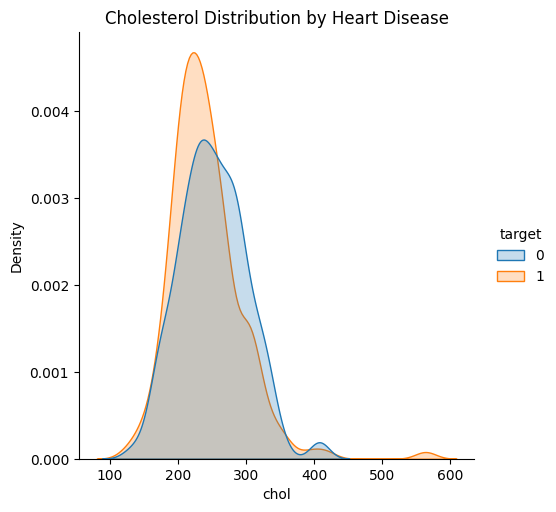

In [135]:
sns.displot(df, x='chol', hue='target', kind='kde', fill=True)
plt.title("Cholesterol Distribution by Heart Disease")
plt.show()

In [136]:
fig = go.Figure()

for t in df['target'].unique():
    fig.add_trace(go.Box(
        y=df[df['target'] == t]['oldpeak'],
        name=f'Target {t}',
        boxmean=True
    ))

fig.update_layout(title='Oldpeak Distribution by Target',
                  yaxis_title='Oldpeak')
fig.show()
